## Dinucleotide mutational fequencies in dsDNA viruses fed into unsupervised learning algortithms for clsutering

In [1]:
cd /Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019/

/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019


In [2]:
import Bio
import Bio.Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

def make_rc_record(record):
    """Returns a new SeqRecord with the reverse complement sequence."""
    return SeqRecord(seq = record.seq.reverse_complement(), \
                 id = "rc_" + record.id, \
                 description = "reverse complement")

In [3]:
#remeber: run Gabe's perl script on the cluster, then out file goes here

In [4]:
import pandas as pd
import numpy as np

all_viruses = pd.read_csv("./input_data/NEW_BK_JC_hpyv7_VP1.fasta.full.txt", header = None, sep='\t', names = ["id #", "dinucl", "frequency", "actual id"])

all_viruses.columns = ["nucl", "frequency", "id #", "actual id"]
no_RC = pd.DataFrame(all_viruses.iloc[:,0:3])
#no_RC.index = no_RC['nucl']
print(no_RC)


    nucl  frequency                  id #
1     GT   0.940723            KF468310.1
1     GA   0.926104            KF468310.1
1     AG   1.125392            KF468310.1
1     TC   0.633261            KF468310.1
1     GC   0.935222            KF468310.1
1     GG   1.218677            KF468310.1
1     CA   1.040185            KF468310.1
1     AT   0.809657            KF468310.1
1     TA   0.833471            KF468310.1
1     TG   1.419336            KF468310.1
1     CC   1.798913            KF468310.1
1     CG   0.038968            KF468310.1
1     CT   1.246733            KF468310.1
1     TT   1.123107            KF468310.1
1     AC   0.829336            KF468310.1
1     AA   1.141752            KF468310.1
1    ACC   0.998460            KF468310.1
1    CCA   1.099334            KF468310.1
1    AAA   1.162196            KF468310.1
1    CTT   1.208246            KF468310.1
1    TCT   0.750001            KF468310.1
1    TAC   1.130025            KF468310.1
1    CAG   1.768723            KF4

In [5]:
import numpy as np
#pivoting, like melting, data for column selction to new df 
df = no_RC.pivot(index='id #', columns='nucl', values='frequency') 
df2 = no_RC.pivot(index='nucl', columns='id #', values='frequency')
df22 = df2.iloc[1:] 
df22.head()

id #,HF955451.1,HF955452.1,HF955453.1,HF955454.1,HF955455.1,HF955456.1,HF955457.1,HF955458.1,HF955459.1,HF955460.1,...,MH647651.1,MH647652.1,MH647653.1,MH671352.1,MH708168.1,MH744484.1,MH744485.1,MH758781.1,MK412337.1,NC_014407.1:1305-2447
nucl,,,,,,,,,,,,,,,,,,,,,
AA,1.023582,1.016370,1.032501,1.035731,1.029630,1.054257,1.029214,1.042025,1.016370,1.020354,...,1.124452,1.111415,1.101986,0.907820,0.992724,0.994697,0.992004,0.990950,1.189831,1.107534
AAA,0.993427,1.024108,1.030497,1.015016,1.018019,0.979812,1.018097,0.985199,1.024108,1.008596,...,1.235004,1.242226,1.159490,1.256415,1.267659,1.267659,1.259264,1.308373,1.030913,1.088135
AAC,1.100789,1.009950,1.084057,1.111684,1.018019,1.111958,0.978594,1.081306,0.993919,1.076191,...,0.950003,0.955559,0.849394,1.346159,1.272802,1.272802,1.264373,1.209420,1.507710,0.847970
AAG,0.870556,0.903749,0.832511,0.842247,0.867995,0.837997,0.931193,0.841184,0.903749,0.834660,...,0.339287,0.341271,0.443611,0.655521,0.596546,0.596546,0.606063,0.602023,0.483240,0.780655
AAT,1.065414,1.058962,1.065614,1.059147,1.106542,1.117329,1.058196,1.133770,1.074767,1.116602,...,1.468187,1.433338,1.532473,0.886881,0.943754,0.943754,0.937504,0.952419,1.256425,1.340124


In [6]:
dftest_T= df22.T
dftest_T.head()

nucl,AA,AAA,AAC,AAG,AAT,AAW,AC,ACA,ACC,ACG,...,TRT,TT,TTA,TTC,TTG,TTT,WG,WGG,YC,YCC
id #,,,,,,,,,,,,,,,,,,,,,
HF955451.1,1.023582,0.993427,1.100789,0.870556,1.065414,NaN,1.056100,1.166296,0.756741,NaN,...,NaN,1.342070,1.030789,1.352297,0.686010,1.103916,NaN,NaN,NaN,NaN
HF955452.1,1.016370,1.024108,1.009950,0.903749,1.058962,NaN,1.027551,1.179725,0.743226,1.032259,...,NaN,1.287441,0.982759,1.227274,0.731708,1.141305,NaN,NaN,NaN,NaN
HF955453.1,1.032501,1.030497,1.084057,0.832511,1.065614,NaN,1.059838,1.136997,0.730927,1.492309,...,NaN,1.296570,1.035107,1.238002,0.693723,1.132640,NaN,NaN,NaN,NaN
HF955454.1,1.035731,1.015016,1.111684,0.842247,1.059147,NaN,1.051283,1.185186,0.764707,NaN,...,NaN,1.296570,0.985816,1.440809,0.695870,1.101178,NaN,NaN,NaN,NaN
HF955455.1,1.029630,1.018019,1.018019,0.867995,1.106542,NaN,1.021167,1.159291,0.739048,NaN,...,NaN,1.277906,1.032016,1.245456,0.714130,1.116297,NaN,NaN,NaN,NaN


In [7]:
#Now sepreating out di and tri nucls

In [8]:
#dftest_T.index
dftest_T.columns

Index(['AA', 'AAA', 'AAC', 'AAG', 'AAT', 'AAW', 'AC', 'ACA', 'ACC', 'ACG',
       ...
       'TRT', 'TT', 'TTA', 'TTC', 'TTG', 'TTT', 'WG', 'WGG', 'YC', 'YCC'],
      dtype='object', name='nucl', length=149)

In [9]:
list(dftest_T.filter(regex='N'))

['AGN',
 'AN',
 'ANA',
 'ANC',
 'ANT',
 'CAN',
 'CCN',
 'CN',
 'CNA',
 'CNC',
 'CNG',
 'GAN',
 'GN',
 'GNA',
 'NAC',
 'NAG',
 'NAN',
 'NC',
 'NCA',
 'NG',
 'NGT',
 'NT',
 'NTG',
 'TAN',
 'TCN']

In [10]:
#Now filter out any "N"ds or "S"s
#for dinucl
temp = dftest_T[dftest_T.columns.drop(list(dftest_T.filter(regex='N')))]
print(temp.shape)

temp2 = temp[temp.columns.drop(list(temp.filter(regex='S|n|Y|R|W|V|P|M|Q|L|K|F|I|D|H|E')))]


#print(temp5.columns)
print(temp2)
yy = temp2

yy.to_csv("./di_and_tri_nucls.csv")

(624, 124)
nucl                         AA       AAA       AAC       AAG       AAT  \
id #                                                                      
HF955451.1             1.023582  0.993427  1.100789  0.870556  1.065414   
HF955452.1             1.016370  1.024108  1.009950  0.903749  1.058962   
HF955453.1             1.032501  1.030497  1.084057  0.832511  1.065614   
HF955454.1             1.035731  1.015016  1.111684  0.842247  1.059147   
HF955455.1             1.029630  1.018019  1.018019  0.867995  1.106542   
HF955456.1             1.054257  0.979812  1.111958  0.837997  1.117329   
HF955457.1             1.029214  1.018097  0.978594  0.931193  1.058196   
HF955458.1             1.042025  0.985199  1.081306  0.841184  1.133770   
HF955459.1             1.016370  1.024108  0.993919  0.903749  1.074767   
HF955460.1             1.020354  1.008596  1.076191  0.834660  1.116602   
HF955461.1             1.023115  1.021127  1.014479  0.878707  1.091204   
HF955462.1    

In [11]:
two = pd.Series(yy.columns.str.len() == 2)
three = pd.Series(yy.columns.str.len() == 3)

In [12]:
#retranspose again b/c first time retain original indecies, so that's why it's weird above. anyway..
#two_df = dftest[two.values].T
three_df = yy.T
print(three_df.columns)

Index(['HF955451.1', 'HF955452.1', 'HF955453.1', 'HF955454.1', 'HF955455.1',
       'HF955456.1', 'HF955457.1', 'HF955458.1', 'HF955459.1', 'HF955460.1',
       ...
       'MH647651.1', 'MH647652.1', 'MH647653.1', 'MH671352.1', 'MH708168.1',
       'MH744484.1', 'MH744485.1', 'MH758781.1', 'MK412337.1',
       'NC_014407.1:1305-2447'],
      dtype='object', name='id #', length=624)


In [13]:
print(three_df[three.values]) #two.values

id #  HF955451.1  HF955452.1  HF955453.1  HF955454.1  HF955455.1  HF955456.1  \
nucl                                                                           
AAA     0.993427    1.024108    1.030497    1.015016    1.018019    0.979812   
AAC     1.100789    1.009950    1.084057    1.111684    1.018019    1.111958   
AAG     0.870556    0.903749    0.832511    0.842247    0.867995    0.837997   
AAT     1.065414    1.058962    1.065614    1.059147    1.106542    1.117329   
ACA     1.166296    1.179725    1.136997    1.185186    1.159291    1.152440   
ACC     0.756741    0.743226    0.730927    0.764707    0.739048    0.694854   
ACG          NaN    1.032259    1.492309         NaN         NaN         NaN   
ACT     1.008256    0.957186    0.994873    0.981819    1.026456    1.093751   
AGA     1.096696    1.016860    1.051963    1.106384    1.014332    1.113044   
AGC     0.769925    0.900344    0.902468    0.845154    0.807398    0.795032   
AGG     1.099170    1.080413    1.091911

In [14]:
#testcol = three_df['AAA'].div(three_df.groupby.cols['AAA'].shift(4))
#print(testcol.head())
#print(three_df['AAA'].shift(4))
print(three_df)
three_df.to_csv("/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019/three_df_April2019.csv")

id #  HF955451.1  HF955452.1  HF955453.1  HF955454.1  HF955455.1  HF955456.1  \
nucl                                                                           
AA      1.023582    1.016370    1.032501    1.035731    1.029630    1.054257   
AAA     0.993427    1.024108    1.030497    1.015016    1.018019    0.979812   
AAC     1.100789    1.009950    1.084057    1.111684    1.018019    1.111958   
AAG     0.870556    0.903749    0.832511    0.842247    0.867995    0.837997   
AAT     1.065414    1.058962    1.065614    1.059147    1.106542    1.117329   
AC      1.056100    1.027551    1.059838    1.051283    1.021167    1.058574   
ACA     1.166296    1.179725    1.136997    1.185186    1.159291    1.152440   
ACC     0.756741    0.743226    0.730927    0.764707    0.739048    0.694854   
ACG          NaN    1.032259    1.492309         NaN         NaN         NaN   
ACT     1.008256    0.957186    0.994873    0.981819    1.026456    1.093751   
AG      1.163489    1.178103    1.136778

In [15]:
#three_df.iloc[:, ::4]
#print(three_df.iloc[:,0])
#...wat?

## Now running the calculation on the second position

In [16]:
import itertools

In [17]:
#1 arry trint
#2 array sub
#loops
#naming

In [18]:
trint = (list(itertools.product('ATCG','ATCG')))
trint_asarry = np.asarray(trint)
print(trint_asarry)

sub = (['C', 'A'],['C', 'T'],['C', 'G'],['T', 'A'],['T', 'C'],['T', 'G'])
sub_asarry = np.asarray(sub)
print(sub_asarry)

[['A' 'A']
 ['A' 'T']
 ['A' 'C']
 ['A' 'G']
 ['T' 'A']
 ['T' 'T']
 ['T' 'C']
 ['T' 'G']
 ['C' 'A']
 ['C' 'T']
 ['C' 'C']
 ['C' 'G']
 ['G' 'A']
 ['G' 'T']
 ['G' 'C']
 ['G' 'G']]
[['C' 'A']
 ['C' 'T']
 ['C' 'G']
 ['T' 'A']
 ['T' 'C']
 ['T' 'G']]


In [19]:
naming = str([trint_asarry[0,0] + "[" + sub_asarry[0,0] + ">" + sub_asarry[0,1] +"]" + trint_asarry[0,1]])
print(naming)
#sub_asarry
#print(naming)
print(str([trint_asarry[1,0] + "[" + sub_asarry[1,0] + ">" + sub_asarry[1,1] +"]" + trint_asarry[1,1]]))

['A[C>A]A']
['A[C>T]T']


In [20]:
# don't need any of the above

In [21]:
print(three_df)

id #  HF955451.1  HF955452.1  HF955453.1  HF955454.1  HF955455.1  HF955456.1  \
nucl                                                                           
AA      1.023582    1.016370    1.032501    1.035731    1.029630    1.054257   
AAA     0.993427    1.024108    1.030497    1.015016    1.018019    0.979812   
AAC     1.100789    1.009950    1.084057    1.111684    1.018019    1.111958   
AAG     0.870556    0.903749    0.832511    0.842247    0.867995    0.837997   
AAT     1.065414    1.058962    1.065614    1.059147    1.106542    1.117329   
AC      1.056100    1.027551    1.059838    1.051283    1.021167    1.058574   
ACA     1.166296    1.179725    1.136997    1.185186    1.159291    1.152440   
ACC     0.756741    0.743226    0.730927    0.764707    0.739048    0.694854   
ACG          NaN    1.032259    1.492309         NaN         NaN         NaN   
ACT     1.008256    0.957186    0.994873    0.981819    1.026456    1.093751   
AG      1.163489    1.178103    1.136778

In [23]:
three_dft = three_df.T #have to transpose again here....ya this code sucks

for index, row in three_dft.iterrows():
    print(row['AAA']) #/ row['ACA'])

0.9934267358017608
1.0241078135125057
1.030496778024243
1.015015911596146
1.0180189172517555
0.9798118295679312
1.0180970191579573
0.985199397927923
1.0241078135125057
1.0085959322325657
1.0211270698102133
0.9941529249361188
1.037037953070618
1.0106808500320663
0.978636068527818
1.0404067573859508
1.0026455137533177
1.037037953070618
1.0056207229929417
1.05336803675572
1.05336803675572
1.0085959322325657
1.05336803675572
1.05336803675572
0.987583049120574
1.0241078135125057
1.0056207229929417
1.037037953070618
1.0701326647398353
1.037037953070618
1.0085959322325657
1.037037953070618
1.0085959322325657
1.008231343263101
1.0502236545564492
1.030496778024243
1.0180970191579573
1.0271648517617966
0.9927624289821516
1.015015911596146
1.0241078135125057
1.0056207229929417
1.05336803675572
1.0085959322325657
1.008231343263101
1.0085959322325657
1.037037953070618
1.0241078135125057
1.1419761842804563
1.152368274137311
1.0881352650816483
1.0881352650816483
1.1041278352099737
1.1167704036364283


In [ ]:
#print(three_df.iloc[0,:])
print(three_df.index)
print(len(three_df.index))

In [ ]:
#three_df = pd.read_csv("./three_df_April2019.csv")
#three_df = three_df.set_index('nucl')
#three_df.head()

In [24]:
three_df = three_dft

In [25]:
mutations_df = pd.DataFrame()
mutations_df['A[C>A]A'] = three_df['AAA']/three_df['ACA']
mutations_df['A[C>A]C'] = three_df['AAC']/three_df['ACC']
mutations_df['A[C>A]G'] = three_df['AAG']/three_df['ACG']
mutations_df['A[C>A]T'] = three_df['AAT']/three_df['ACT']
mutations_df['A[C>G]A'] = three_df['AGA']/three_df['ACA']
mutations_df['A[C>G]C'] = three_df['AGC']/three_df['ACC']
mutations_df['A[C>G]G'] = three_df['AGG']/three_df['ACG']
mutations_df['A[C>G]T'] = three_df['AGT']/three_df['ACT'] ##
mutations_df['A[C>T]A'] = three_df['ATA']/three_df['ACA']
mutations_df['A[C>T]C'] = three_df['ATC']/three_df['ACC']
mutations_df['A[C>T]G'] = three_df['ATG']/three_df['ACG']
mutations_df['A[C>T]T'] = three_df['ATT']/three_df['ACT']
mutations_df['A[T>A]A'] = three_df['AAA']/three_df['ATA']
mutations_df['A[T>A]C'] = three_df['AAC']/three_df['ATC']
mutations_df['A[T>A]G'] = three_df['AAG']/three_df['ATG']
mutations_df['A[T>A]T'] = three_df['AAT']/three_df['ATT'] ##
mutations_df['A[T>C]A'] = three_df['ACA']/three_df['ATA']
mutations_df['A[T>C]C'] = three_df['ACC']/three_df['ATC']
mutations_df['A[T>C]G'] = three_df['ACG']/three_df['ATG']
mutations_df['A[T>C]T'] = three_df['ACT']/three_df['ATT']
mutations_df['A[T>G]A'] = three_df['AGA']/three_df['ATA']
mutations_df['A[T>G]C'] = three_df['AGC']/three_df['ATC']
mutations_df['A[T>G]G'] = three_df['AGG']/three_df['ATG']
mutations_df['A[T>G]T'] = three_df['AGT']/three_df['ATT']
mutations_df['C[C>A]A'] = three_df['CAA']/three_df['CCA']
mutations_df['C[C>A]C'] = three_df['CAC']/three_df['CCC']
mutations_df['C[C>A]G'] = three_df['CAG']/three_df['CCG']
mutations_df['C[C>A]T'] = three_df['CAT']/three_df['CCT']
mutations_df['C[C>G]A'] = three_df['CGA']/three_df['CCA']
mutations_df['C[C>G]C'] = three_df['CGC']/three_df['CCC']
mutations_df['C[C>G]G'] = three_df['CGG']/three_df['CCG'] ##
mutations_df['C[C>G]T'] = three_df['CGT']/three_df['CCT']
mutations_df['C[C>T]A'] = three_df['CTA']/three_df['CCA']
mutations_df['C[C>T]C'] = three_df['CTC']/three_df['CCC']
mutations_df['C[C>T]G'] = three_df['CTG']/three_df['CCG']
mutations_df['C[C>T]T'] = three_df['CTT']/three_df['CCT']
mutations_df['C[T>A]A'] = three_df['CAA']/three_df['CTA']
mutations_df['C[T>A]C'] = three_df['CAC']/three_df['CTC']
mutations_df['C[T>A]G'] = three_df['CAG']/three_df['CTG'] ##
mutations_df['C[T>A]T'] = three_df['CAT']/three_df['CTT']
mutations_df['C[T>C]A'] = three_df['CCA']/three_df['CTA']
mutations_df['C[T>C]C'] = three_df['CCC']/three_df['CTC']
mutations_df['C[T>C]G'] = three_df['CCG']/three_df['CTG']
mutations_df['C[T>C]T'] = three_df['CCT']/three_df['CTT']
mutations_df['C[T>G]A'] = three_df['CGA']/three_df['CTA']
mutations_df['C[T>G]C'] = three_df['CGC']/three_df['CTC']
mutations_df['C[T>G]G'] = three_df['CGG']/three_df['CTG']
mutations_df['C[T>G]T'] = three_df['CGT']/three_df['CTT']
mutations_df['G[C>A]A'] = three_df['GAA']/three_df['GCA']
mutations_df['G[C>A]C'] = three_df['GAC']/three_df['GCC']
mutations_df['G[C>A]G'] = three_df['GAG']/three_df['GCG']
mutations_df['G[C>A]T'] = three_df['GAT']/three_df['GCT']
mutations_df['G[C>G]A'] = three_df['GGA']/three_df['GCA']
mutations_df['G[C>G]C'] = three_df['GGC']/three_df['GCC']##
mutations_df['G[C>G]G'] = three_df['GGG']/three_df['GCG'] 
mutations_df['G[C>G]T'] = three_df['GGT']/three_df['GCT']
mutations_df['G[C>T]A'] = three_df['GTA']/three_df['GCA']
mutations_df['G[C>T]C'] = three_df['GTC']/three_df['GCC']
mutations_df['G[C>T]G'] = three_df['GTG']/three_df['GCG']
mutations_df['G[C>T]T'] = three_df['GTT']/three_df['GCT']
mutations_df['G[T>A]A'] = three_df['GAA']/three_df['GTA']
mutations_df['G[T>A]C'] = three_df['GAC']/three_df['GTC'] ##
mutations_df['G[T>A]G'] = three_df['GAG']/three_df['GTG']
mutations_df['G[T>A]T'] = three_df['GAT']/three_df['GTT']
mutations_df['G[T>C]A'] = three_df['GCA']/three_df['GTA']
mutations_df['G[T>C]C'] = three_df['GCC']/three_df['GTC']
mutations_df['G[T>C]G'] = three_df['GCG']/three_df['GTG']
mutations_df['G[T>C]T'] = three_df['GCT']/three_df['GTT']
mutations_df['G[T>G]A'] = three_df['GGA']/three_df['GTA']
mutations_df['G[T>G]C'] = three_df['GGC']/three_df['GTC']
mutations_df['G[T>G]G'] = three_df['GGG']/three_df['GTG']
mutations_df['G[T>G]T'] = three_df['GGT']/three_df['GTT']
mutations_df['T[C>A]A'] = three_df['TAA']/three_df['TCA']
mutations_df['T[C>A]C'] = three_df['TAC']/three_df['TCC']
mutations_df['T[C>A]G'] = three_df['TAG']/three_df['TCG']
mutations_df['T[C>A]T'] = three_df['TAT']/three_df['TCT']
mutations_df['T[C>G]A'] = three_df['TGA']/three_df['TCA'] ##
mutations_df['T[C>G]C'] = three_df['TGC']/three_df['TCC']
mutations_df['T[C>G]G'] = three_df['TGG']/three_df['TCG']
mutations_df['T[C>G]T'] = three_df['TGT']/three_df['TCT']
mutations_df['T[C>T]A'] = three_df['TTA']/three_df['TCA']
mutations_df['T[C>T]C'] = three_df['TTC']/three_df['TCC']
mutations_df['T[C>T]G'] = three_df['TTG']/three_df['TCG']
mutations_df['T[C>T]T'] = three_df['TTT']/three_df['TCT']
mutations_df['T[T>A]A'] = three_df['TAA']/three_df['TTA'] ##
mutations_df['T[T>A]C'] = three_df['TAC']/three_df['TTC']
mutations_df['T[T>A]G'] = three_df['TAG']/three_df['TTG']
mutations_df['T[T>A]T'] = three_df['TAT']/three_df['TTT']
mutations_df['T[T>C]A'] = three_df['TCA']/three_df['TTA']
mutations_df['T[T>C]C'] = three_df['TCC']/three_df['TTC']
mutations_df['T[T>C]G'] = three_df['TCG']/three_df['TTG']
mutations_df['T[T>C]T'] = three_df['TCT']/three_df['TTT']
mutations_df['T[T>G]A'] = three_df['TGA']/three_df['TTA']
mutations_df['T[T>G]C'] = three_df['TGC']/three_df['TTC']
mutations_df['T[T>G]G'] = three_df['TGG']/three_df['TTG']
mutations_df['T[T>G]T'] = three_df['TGT']/three_df['TTT']

#print(mutations_df) #why 96, but not my problem rn, this list was taken from the cancer atlas' "signatures_probabilites.txt table that I'll use later on)"
#print(mutations_df['A[C>G]T'])

print(three_df['AGT'])
#print(three_df['ACT'])

id #
HF955451.1               0.867797
HF955452.1               0.929864
HF955453.1               0.863569
HF955454.1               0.829788
HF955455.1               0.936480
HF955456.1               0.863569
HF955457.1               0.932378
HF955458.1               0.857620
HF955459.1               0.926315
HF955460.1               0.862112
HF955461.1               0.927744
HF955462.1               0.949204
HF955463.1               0.860957
HF955464.1               0.929864
HF955465.1               0.867797
HF955466.1               0.855100
HF955467.1               0.932378
HF955468.1               0.857620
HF955469.1               0.824211
HF955470.1               0.866942
HF955471.1               0.851798
HF955472.1               0.862112
HF955473.1               0.866742
HF955474.1               0.835638
HF955475.1               0.869150
HF955476.1               0.857620
HF955477.1               0.817895
HF955478.1               0.860957
HF955479.1               0.855100
HF955480.

In [76]:
mutations_df.to_csv("/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019/enrich_deplt_scores_VP1s.csv")
#/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/

## The ML model starts here

In [27]:
from sklearn.cluster import KMeans #already loaded
from sklearn.datasets import make_regression
import seaborn as sns
import scipy.spatial.distance
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#may or may not use all of these
import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

In [29]:
#replace NaNs with 0s...later look into why theyre there

mutations_df_noNA = mutations_df.fillna(0)

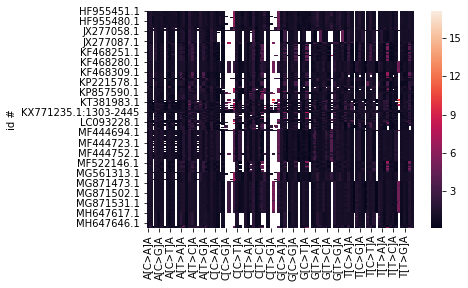

In [30]:
import seaborn as sns
%matplotlib inline

sns.heatmap(mutations_df) #don't think this is actually valuable 

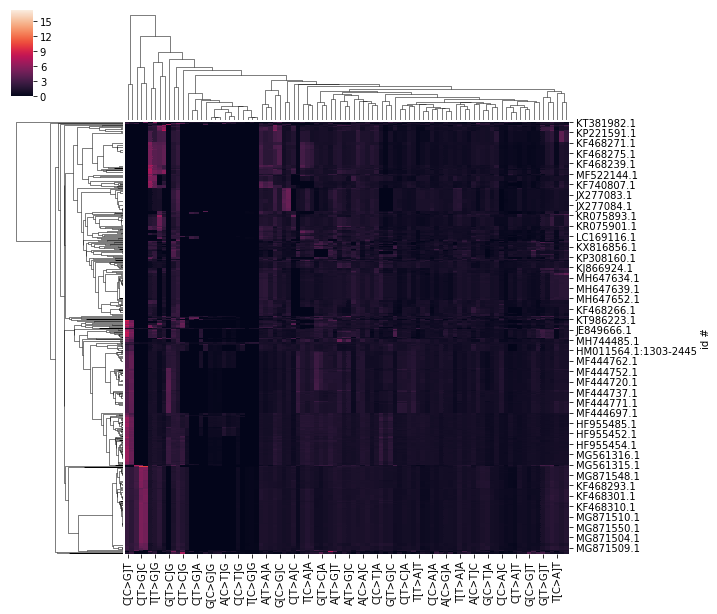

In [31]:
sns.clustermap(mutations_df_noNA)

## Dimensionality reduction tests. It's def necessary

In [ ]:
%%time
print("Dimensionality", mutations_df_noNA.shape)
D = sklearn.metrics.pairwise_distances(mutations_df_noNA, metric='braycurtis', n_jobs=-1)
print("Pairwise distances:")
sns.heatmap(D, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.5)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
E = sklearn.metrics.pairwise.euclidean_distances(mutations_df_noNA)

sns.heatmap(E, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.5)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [34]:
#CLASS CODE#### ~for below cell
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

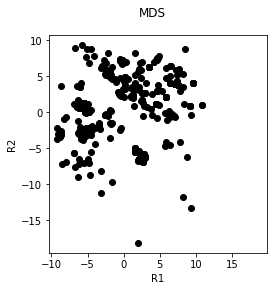

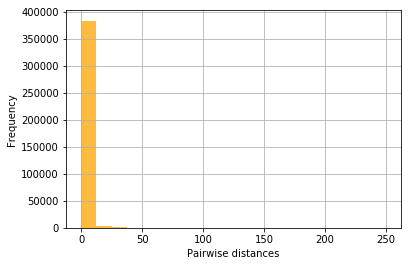

In [37]:
# non-linear transformations:
from sklearn.manifold import MDS, Isomap, TSNE

R_MDS = MDS(n_components=2).fit_transform(mutations_df_noNA)
scatterplot_2D(R_MDS, 'MDS') 


E = sklearn.metrics.pairwise_distances(R_MDS, metric='braycurtis', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

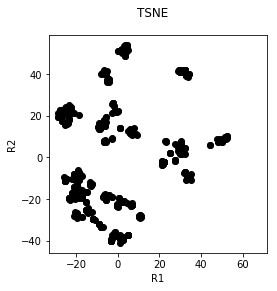

In [38]:
R_TSNE = TSNE(n_components=2, perplexity=20).fit_transform(mutations_df_noNA)
scatterplot_2D(R_TSNE, 'TSNE') #once I define y in np array: scatterplot_2D(R_TSNE, 'TSNE', y), y for colour

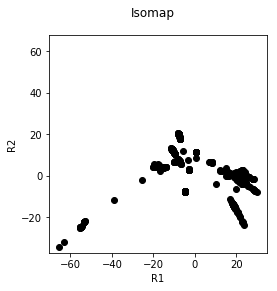

In [39]:
R_ISO = Isomap(n_components=2).fit_transform(mutations_df_noNA)
scatterplot_2D(R_ISO, 'Isomap') #scatterplot_2D(R_ISO, 'Isomap', y)

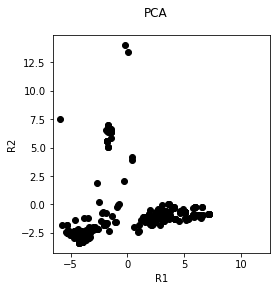

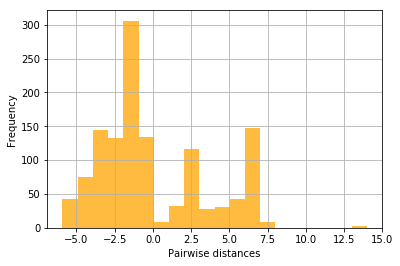

In [74]:
PCA = sklearn.decomposition.PCA(n_components=2).fit_transform(mutations_df_noNA)
scatterplot_2D(PCA, 'PCA') #scatterplot_2D(R_ISO, 'Isomap', y)


E = sklearn.metrics.pairwise_distances(PCA, metric='braycurtis', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

plt.hist(np.hstack(PCA), 20, facecolor='orange', alpha=0.75)
#plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## We choose TSNE as DR method, moving on to cluster testing now

In [41]:
###THIS CODE IS NOT MINE, FROM CLASS##### #this is necessary for below of using kmeans
import matplotlib.pyplot as plt
%matplotlib inline

def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100)
df_1_tsne = tsne.fit_transform(mutations_df_noNA) #the DR
print(df_1_tsne.shape)

(624, 2)


In [43]:
#We'll come back to this

#tsne 
model.fit(df_1_tsne)
cluster_labels = model.predict(df_1_tsne)
plot_kmeans(pd.DataFrame(df_1_tsne), cluster_labels, model,3)

NameError: name 'model' is not defined

In [ ]:
#just regular PCA

In [48]:
#dimensionality reduction on PCA

from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
df_1_PCA = PCA.fit_transform(mutations_df_noNA) #the DR
print(df_1_PCA.shape)

(624, 2)


In [ ]:
#Remember, plots below are just one column examples, not full dealio

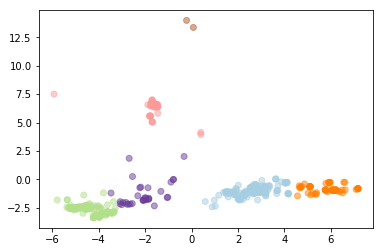

In [49]:
#kmeans
from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=6, random_state=50).fit_predict(df_1_PCA) #using DR here see
plt.subplot()
plt.scatter(df_1_PCA[:, 0], df_1_PCA[:, 1], cmap='Paired', c=ktest, alpha = 0.5) 

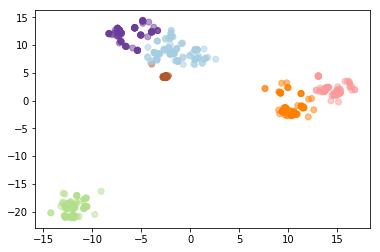

In [44]:
#kmeans
from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=6, random_state=50).fit_predict(df_1_tsne) #using DR here see
plt.subplot()
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], cmap='Paired', c=ktest, alpha = 0.5) 

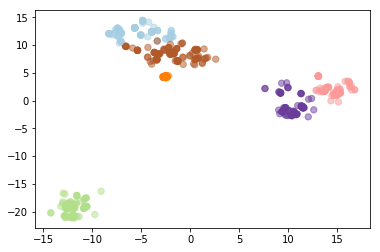

In [45]:
#regular GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(df_1_tsne)
labels = gmm.predict(df_1_tsne)
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=labels, s=40, cmap='Paired', alpha = 0.5)

## Analysis of how many clusters to use

In [ ]:
#below is better code from scikit, produces a slightly different output, but still the same conclusion of max 6 clusters. 
#5 may be better owing to size of plot bars being more similar thatn with c = 6, and the one cluster bar being far over avg silohuette score = overfitting (?)
#matches the silhoette line plot above, not elbow though 
##can replace df_1_tsne with df_1_mds to view that. The results do not look as good as tsne (only a few clusters reasonably above averge, until higher # [overfitting]) 

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.8000386
For n_clusters = 4 The average silhouette_score is : 0.70054275
For n_clusters = 5 The average silhouette_score is : 0.6622842


/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


For n_clusters = 6 The average silhouette_score is : 0.65434384
For n_clusters = 7 The average silhouette_score is : 0.6493311
For n_clusters = 8 The average silhouette_score is : 0.65115243
For n_clusters = 9 The average silhouette_score is : 0.6512493


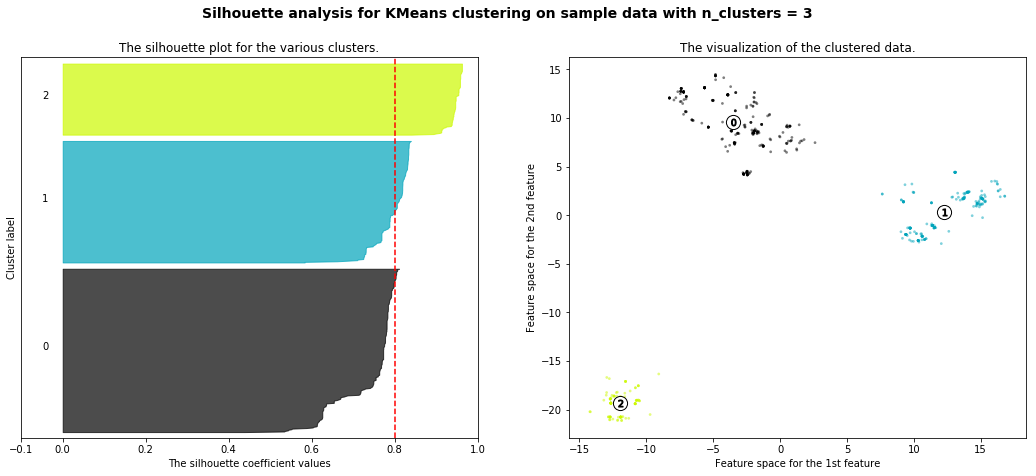

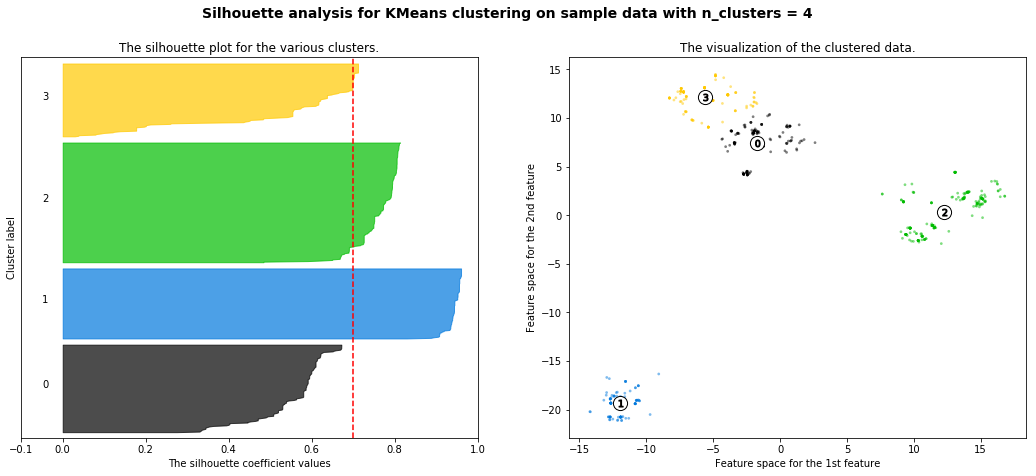

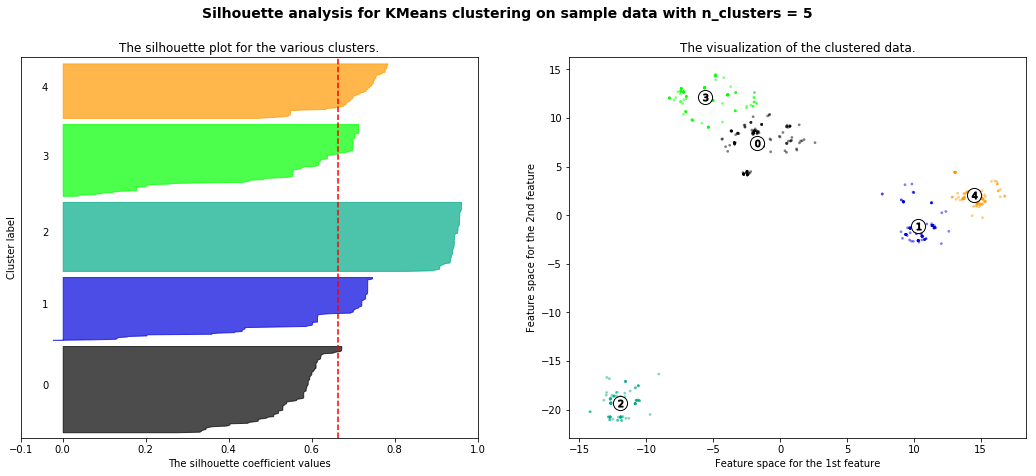

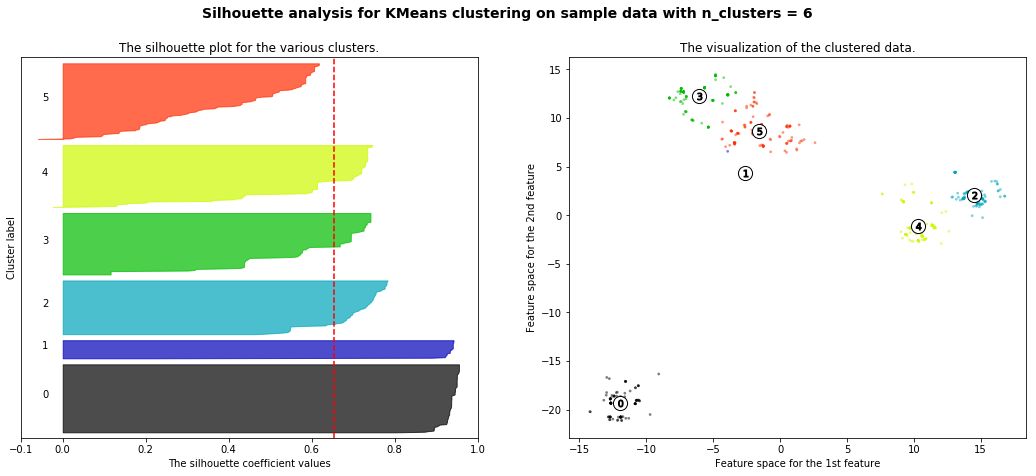

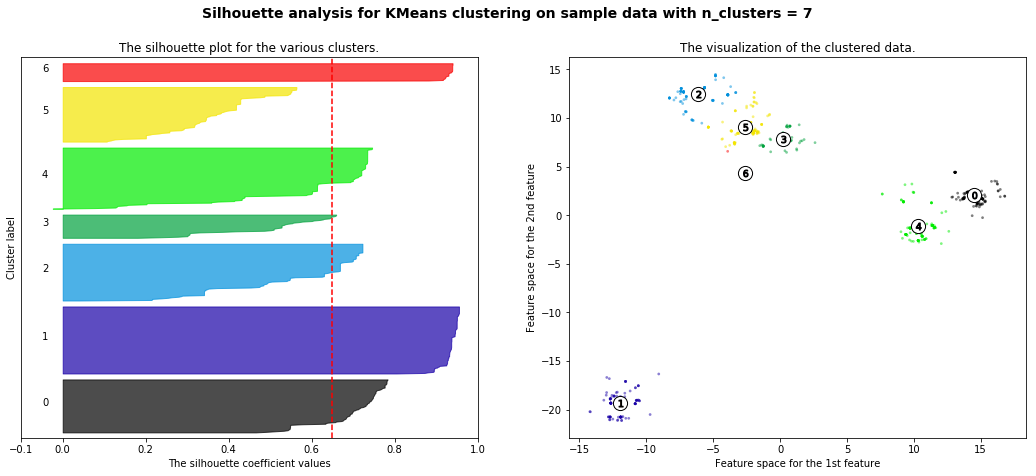

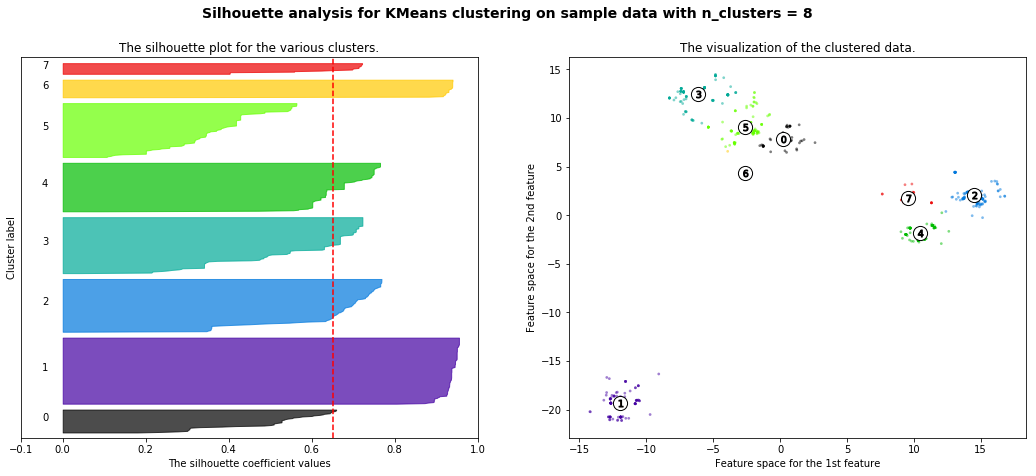

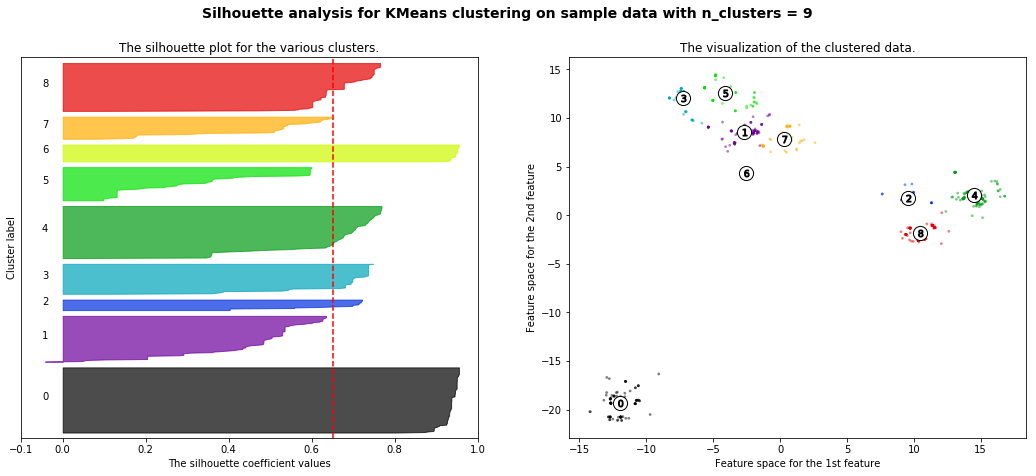

In [57]:
###code not mine, from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html####

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


range_n_clusters = [3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_1_tsne) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_1_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_1_tsne, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_1_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## April 2019 updates

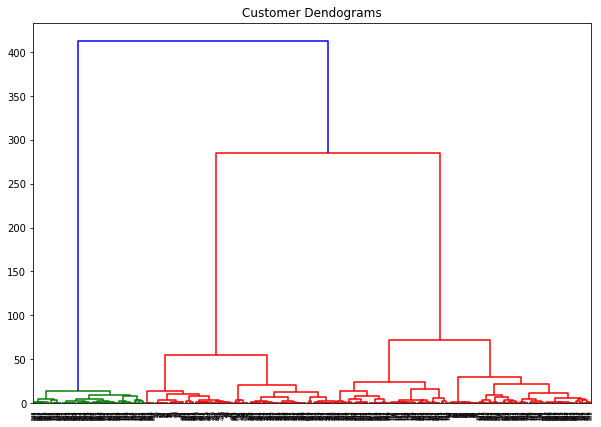

In [58]:
#Histogram for the cluster way we choose
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df_1_tsne, method='ward'))  

/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


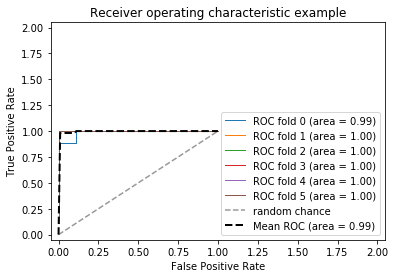

In [75]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

###############################################################################
# Data IO and generation

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X = df_1_tsne
###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='random chance')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 2.05])
plt.ylim([-0.05, 2.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Actually need those model stats now

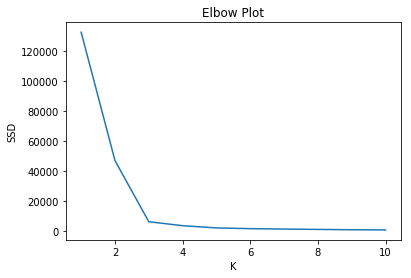

In [55]:
#Elbow method ##class code

def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(df_1_tsne, 10)


/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


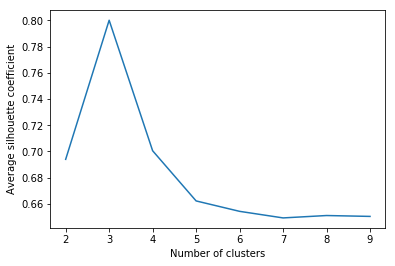

In [56]:
# Silhouette is used for assessing the performance of an unlabeled dataset ##class code
# this is what's shown above in the graphs

from sklearn.metrics.cluster import silhouette_score

def calc_silhouette(dataset, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = KMeans(n_clusters=n).fit(df_1_tsne)
    score = silhouette_score(df_1_tsne, kmeans.labels_)
    return score

scores = {n: calc_silhouette(df_1_tsne, n) for n in range(2, 10)}
# pprint.pprint(scores)
plt.plot(
    list(scores.keys()),
    list(scores.values())
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()

In [59]:
#AUC / ROC
#ROC CURVE WITH AUC SCORES

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


NameError: name 'StratifiedKFold' is not defined

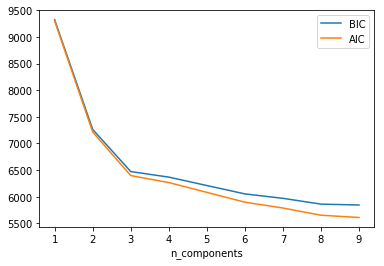

In [63]:
#AIC BIC
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_1_tsne)
          for n in n_components]

plt.plot(n_components, [m.bic(df_1_tsne) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_1_tsne) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Number of features corresponding to max CV score : 8


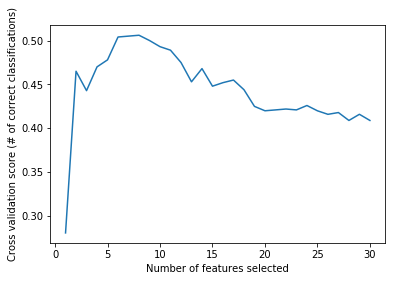

In [64]:
#IDK man this is confusing

# Build a classification task using 5 informative features
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=30, n_informative=5,
                           n_redundant=4, n_repeated=0, n_classes=4,
                           n_clusters_per_class=1, random_state=0,
                                           class_sep=0.2)

# Create the RFE object and compute a cross-validated score.
svc = sklearn.svm.SVC(kernel="linear", class_weight="balanced")
rfecv = sklearn.feature_selection.RFECV(estimator=svc,
                                        step=1,
                                        cv=sklearn.model_selection.StratifiedKFold(2),
                                        scoring='accuracy')
rfecv.fit(X, y)

print("Number of features corresponding to max CV score : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [67]:
from sklearn import decomposition
pca = PCA(n_components=2)
pca.fit(mutations_df_noNA)
PCA(copy=True, n_components=2, whiten=False)
X = pca.transform(mutations_df_noNA)


TypeError: 'PCA' object is not callable

### 3D tsne for fun

TypeError: type object argument after * must be an iterable, not TSNE

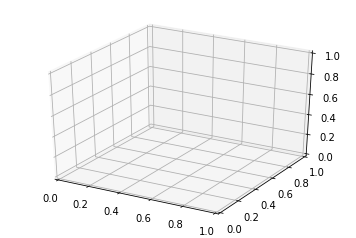

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne))
plt.show()

#plt.scatter(*zip(*tsne[:,:2]), c=X[:,2])
#plt.scatter(*zip(*tsne[:,:2]), c=X[:,2], cmap='RdBu')

## Predicting

In [77]:
id_index = mutations_df_noNA.index # DO I WANT THIS AS TRINUCLS OR MUTS.....

In [78]:
y_pred = KMeans(n_clusters=3, random_state=160).fit_predict(df_1_tsne)

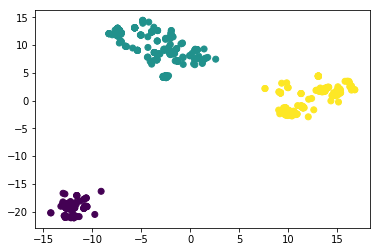

In [79]:
plt.subplot()
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=y_pred) #this is the full df, it was reduced to two columns
#this is all just a one line version of what we decided above

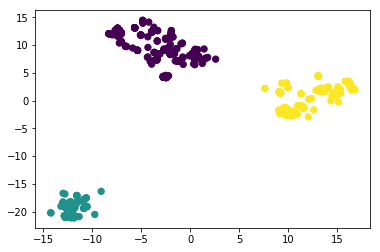

In [80]:
#but if we wanted to look at another method one more time (GMM)
gmm = GaussianMixture(n_components=3).fit(df_1_tsne)
labels = gmm.predict(df_1_tsne)
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=labels, s=40)

## Model evaluation - this method is not fully completed, to get true cluster validation, I need to pull which datasets this subset coresponds to and see if clustering matches with the full dataset


In [ ]:
#Running the model with different data (same data split/changed) 

In [81]:
from sklearn.model_selection import train_test_split
test_1, test_2 = train_test_split(df_1_tsne, shuffle=False)

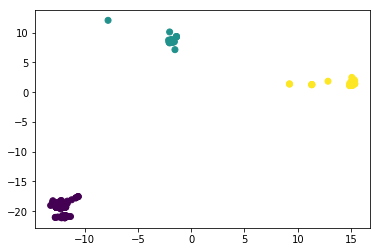

In [82]:
y_pred_test_2 = KMeans(n_clusters=3, random_state=160).fit_predict(test_2)
plt.scatter(test_2[:, 0], test_2[:, 1], c=y_pred_test_2)

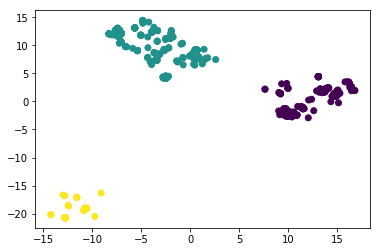

In [83]:
y_pred_test_1 = KMeans(n_clusters=3, random_state=160).fit_predict(test_1)
plt.scatter(test_1[:, 0], test_1[:, 1], c=y_pred_test_1)

In [ ]:
#different method from above

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    df_1_tsne, df_1_tsne)

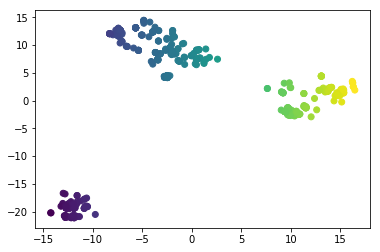

In [85]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:,0])

In [86]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(468, 2) (468, 2)
(156, 2) (156, 2)


In [87]:
model_testing = model.fit(X_train, y_train)
predictions = kmeans.predict(X_test)

NameError: name 'model' is not defined

## Reassigning clusters to viruses (assumes dimensionality reduction did not change the order of the viruses/index)

In [ ]:
#..does tsne reorder data.....?

In [88]:
y_pred.shape
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

NameError: name 'digits' is not defined

In [90]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'digits' is not defined

In [92]:
#DR order retained
yp = list(y_pred)
namestemp =  list(id_index)
clusterstemp = list(y_pred)
#clusterstemp

clustname = zip(namestemp, clusterstemp)
final_out = list(zip(namestemp, clusterstemp))
df_f_o = pd.DataFrame(final_out)

df_f_o.head()
df_f_o.to_csv("./VP1s_clusters_match.csv")